In [87]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
#read the csv file from the url
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data=pd.read_csv(data_url_1)

In [89]:
lefthanded_data.head()

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906


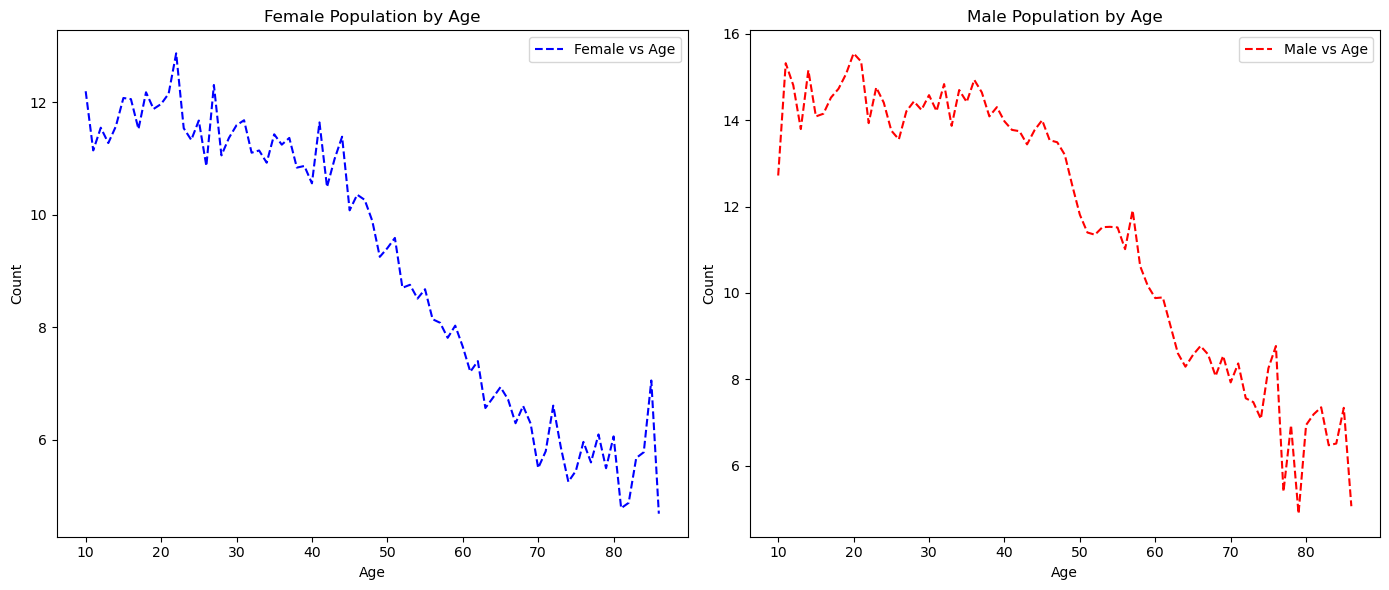

In [91]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

# First plot: Female vs Age
axs[0].plot(lefthanded_data['Age'], lefthanded_data['Female'], 'b--', label='Female vs Age')
axs[0].set_title('Female Population by Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[0].legend()

# Second plot: Male vs Age
axs[1].plot(lefthanded_data['Age'], lefthanded_data['Male'], 'r--', label='Male vs Age')
axs[1].set_title('Male Population by Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count')
axs[1].legend()

plt.tight_layout()

# Display both plots
plt.show()


In [92]:
lefthanded_data['Birth_year']= 1986 - lefthanded_data['Age']

In [93]:
lefthanded_data.head()

,Age,Male,Female,Birth_year
0,10,12.717558,12.198041,1976
1,11,15.318830,11.144804,1975
2,12,14.808281,11.549240,1974
3,13,13.793744,11.276442,1973
4,14,15.156304,11.572906,1972


In [94]:
lefthanded_data['Mean_lh']= (lefthanded_data['Male'] + lefthanded_data['Female'])/2

In [95]:
lefthanded_data.head()

,Age,Male,Female,Birth_year,Mean_lh
0,10,12.717558,12.198041,1976,12.457800
1,11,15.318830,11.144804,1975,13.231817
2,12,14.808281,11.549240,1974,13.178760
3,13,13.793744,11.276442,1973,12.535093
4,14,15.156304,11.572906,1972,13.364605


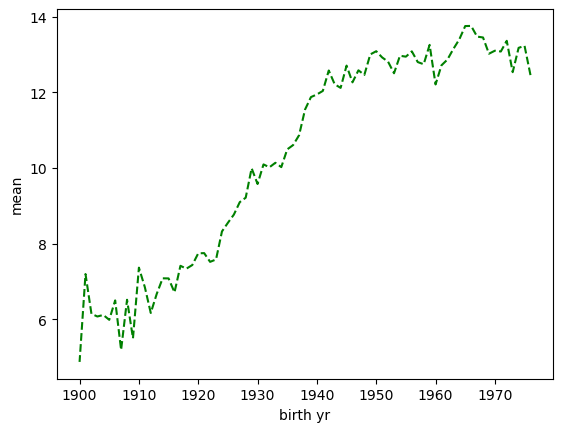

In [96]:
plt.plot(lefthanded_data['Birth_year'],lefthanded_data['Mean_lh'], 'g--', label='birth_yr vs mean')
plt.xlabel('birth yr')
plt.ylabel('mean')
plt.show()

In [97]:
# Task 3: Import numpy and define P(LH | A)
def P_lh_given_A(ages_of_death, study_year=1990):
    
    early_1900s_rate = lefthanded_data['Mean_lh'].tail(10).mean()
    late_1900s_rate = lefthanded_data['Mean_lh'].head(10).mean()
    birth_years = study_year - ages_of_death

    # Initialize array
    P_return = np.zeros_like(ages_of_death, dtype=float)

    # Set early and late cases
    P_return[birth_years < lefthanded_data['Birth_year'].min()] = early_1900s_rate / 100
    P_return[birth_years > lefthanded_data['Birth_year'].max()] = late_1900s_rate / 100

    # For valid birth years: map using lefthanded_data
    valid_mask = (birth_years >= lefthanded_data['Birth_year'].min()) & \
                 (birth_years <= lefthanded_data['Birth_year'].max())
    
    # Create dictionary for fast mapping
    birth_year_to_rate = lefthanded_data.set_index('Birth_year')['Mean_lh'].to_dict()
    
    # Map each valid birth year to the rate
    for i in np.where(valid_mask)[0]:
        year = birth_years[i]
        if year in birth_year_to_rate:
            P_return[i] = birth_year_to_rate[year] / 100
        else:
            P_return[i] = np.nan  

    return P_return


In [98]:
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data= pd.read_csv(data_url_2,sep='\t',skiprows=[1])

In [99]:
death_distribution_data.head()

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0


In [100]:
#check for null values
death_distribution_data.isnull().sum()

Age            0
Both Sexes     5
Male          10
Female         5
dtype: int64

In [101]:
death_distribution_data.dropna(subset=['Both Sexes'],inplace=True)

In [102]:
death_distribution_data.isnull().sum()

Age           0
Both Sexes    0
Male          5
Female        0
dtype: int64

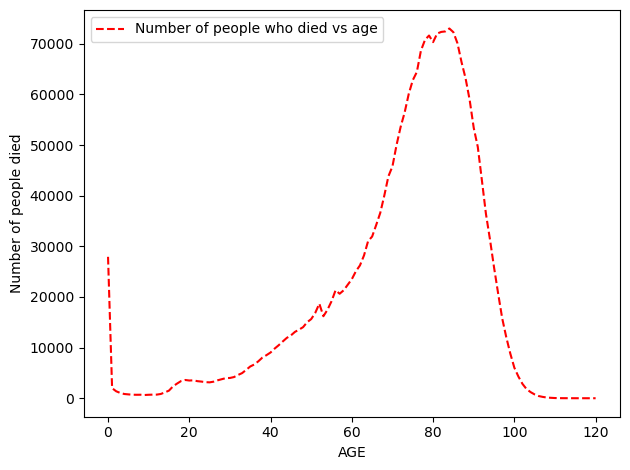

In [103]:
plt.plot(death_distribution_data['Age'],death_distribution_data['Both Sexes'],'r--',label='Number of people who died vs age')
plt.xlabel('AGE')
plt.ylabel('Number of people died')
plt.tight_layout()
plt.legend()
plt.show()


In [104]:
#Probability of left-handedness in thepopulation for a given study year

def P_lh(death_distribution_data, study_year = 1990): 
   ages = death_distribution_data["Age"].values
   deaths = death_distribution_data["Both Sexes"].values
   p_list = deaths * P_lh_given_A(ages, study_year)
   p=np.sum(p_list)
   return p/np.sum(deaths)

print("P(LH) for 1990:", round(P_lh(death_distribution_data), 4))

P(LH) for 1990: 0.0777


In [105]:
# Task 6: P(A | LH)
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    deaths = death_distribution_data.set_index("Age")["Both Sexes"]
    total_deaths = deaths.sum()
    P_A = np.array([deaths.get(age, 0) / total_deaths for age in ages_of_death])
    P_left = P_lh(death_distribution_data, study_year = 1990)
    P_lh_A = P_lh_given_A(ages_of_death, study_year=1990)
    return (P_lh_A*P_A)/P_left

In [106]:
## Task 7: P(A | RH)
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    deaths = death_distribution_data.set_index("Age")["Both Sexes"]
    total_deaths = deaths.sum()
    P_A = np.array([deaths.get(age, 0) / total_deaths for age in ages_of_death])
    P_right = 1- (P_lh(death_distribution_data, study_year = 1990))
    P_rh_A = 1- (P_lh_given_A(ages_of_death, study_year=1990))
    return (P_rh_A*P_A)/P_right

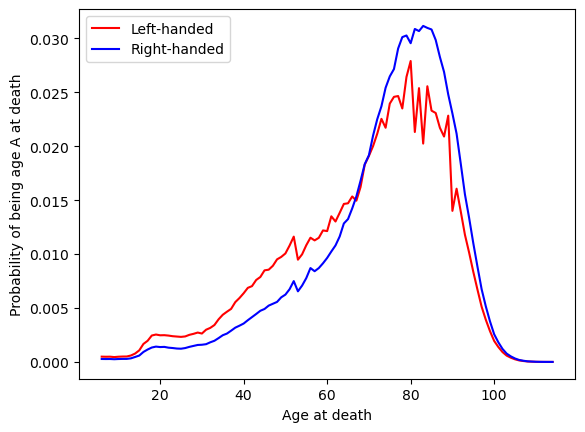

In [107]:
ages = np.arange(6, 115, 1) #  list of ages of death to plot

# calculate the probability of being left- or right-handed for each 
left_handed_probability = P_A_given_lh(ages, death_distribution_data, study_year = 1990)
right_handed_probability = P_A_given_rh(ages, death_distribution_data, study_year = 1990)

# create a plot of the two probabilities vs. age
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, color='red',label = "Left-handed")
ax.plot(ages, right_handed_probability,color='blue', label = "Right-handed")
ax.legend() # add a legend
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")
plt.show()

In [108]:
# calculate average ages for left-handed and right-handed groups
average_lh_age =  np.nansum(ages * np.array(left_handed_probability))
average_rh_age =  np.nansum(ages * np.array(right_handed_probability))
print('Average right handed age',average_rh_age)
print('Average left handed age',average_lh_age)  

# print the difference between the average ages
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

Average right handed age 72.79171936526477
Average left handed age 67.24503662801027
The difference in average ages is 5.5 years.


In [109]:
#Repeat for 2018
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, study_year=2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, study_year=2018)

# calculate average ages for left-handed and right-handed groups
average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))

print("The difference in average ages is " + 
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is 5.5 years.
